# Chapter 2:Drawing with 2D Vectors

*Notes*: 这篇内容很多，故障也很多，回看时多加注意。

## 2.1 Picuturing 2D Vectors

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

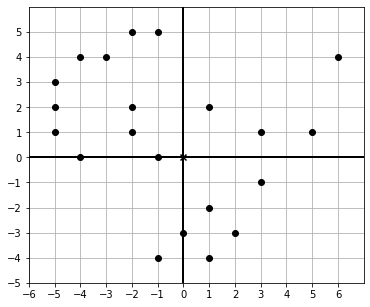

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(Points(*dino_vectors))

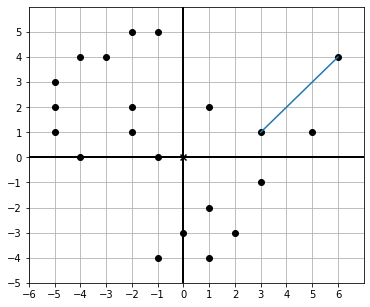

In [3]:
draw(
    Points(*dino_vectors),
    Segment((6,4),(3,1))
)

**EXERCISE**: Draw the dinosaur with the dots connected by constructing a Polygon object with the dino_vectors as its vertices.

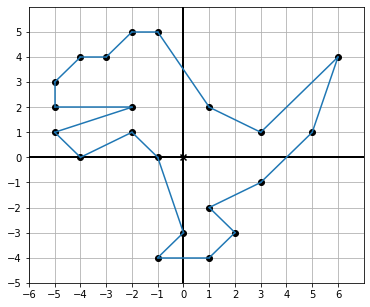

In [4]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**EXERCISE:** Draw the vectors [(x,x**2) for x in range(-10,11] as points(dots) using the draw function. What is the result?

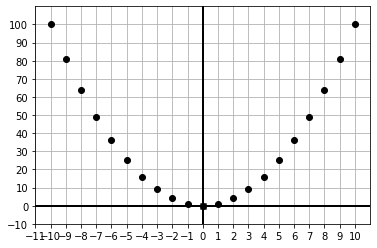

In [5]:
draw(
    Points(*[(x,x**2) for x in range(-10,11)]),
    grid=(1,10),
    nice_aspect_ratio=False #don't require x scale to match y scale
)

# Plane Vector Arithmetic

In [6]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [7]:
dino_vectors2 = [add((-1.5,-2.5),v) for v in dino_vectors]

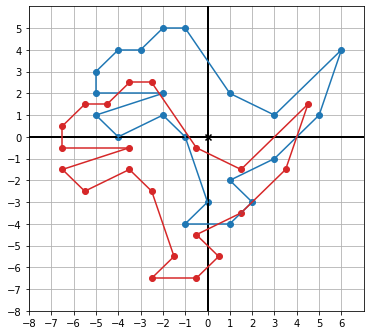

In [8]:
draw(
    Points(*dino_vectors,color=blue),
    Polygon(*dino_vectors,color=blue),
    Points(*dino_vectors2,color=red),
    Polygon(*dino_vectors2,color=red),
)

In [9]:
arrows = [Segment(tip,tail,color=black) for (tip,tail) in zip(dino_vectors2,dino_vectors)]

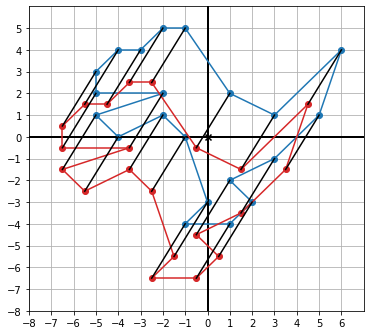

In [10]:
draw(
    Points(*dino_vectors,color=blue),
    Polygon(*dino_vectors,color=blue),
    Points(*dino_vectors2,color=red),
    Polygon(*dino_vectors2,color=red),
    *arrows,
)

# Vector components and lengths

In [11]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2)

# Subtraction,displacement,and distance

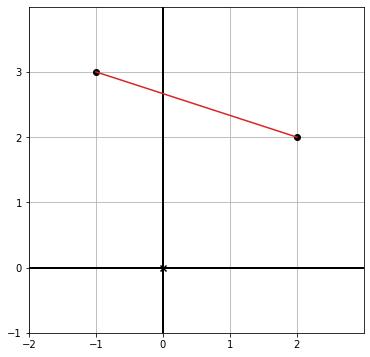

In [12]:
draw(
    Points((2,2),(-1,3)),
    Segment((2,2),(-1,3),color=red),
)

**MINI-PROJECT:**You can add any number of vectors together by summing all of their x-coordinates and all of their y-coordinates. For instance the four-fold sum(1,2) + (2,4) + (3,6) + (4,8) has x-component 1 + 2 +3 + 4 = 10 and y-component 2 + 4 + 6 + 8 = 20, making the result (10, 20). Implement a revised and function that takes any number of vectors as arguments.

In [13]:
def add(*vectors):
    return (sum([v[[0]] for v in vectors]), 
            sum([v[1] for v in vectors]))

**EXERCISE:** Write a function translate(translation,vectors) that takes in a translation vector and a list of input vectors and returns a lsit of the input vectors all translated by the translation vector. For instance, translate((1,1),[(0,0),(0,1),(-3,-3)]) should return [(1,1),(1,2),(-2,-2)].

In [18]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]
translate((1,1),[(0,0),(0,1),(-3,-3)])

TypeError: tuple indices must be integers or slices, not list

**MINI-PROJECT:** Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur. This shows the power of coumputer graphics:image how tedious it would be to specify all 2,100 coordinate pairs by hand!

In [19]:
def hundred_dinos():
    translations = [
        (12*x,10*y)
        for x in range(-5,5)
        for y in range(-5,5)
    ]
    
    dinos = [Polygon(*translate(t,dino_vectors),color=blue)
                for t in translations
            ]
    
    draw(*dinos, grid=None, axes=None, origin=None)

In [20]:
hundred_dinos()

TypeError: tuple indices must be integers or slices, not list

**EXERCISE:** What vector in the dino_vectors list has the logngest length? Use the Python function to compute the answer quickyly.

In [34]:
max(dino_vectors,key=length)

(6, 4)

**EXERCISE:** Suppose a vector  $\vec{w}$ has coordinates(2,3.What are the approximate coordinates of the scalar multiple $\pi \cdot \vec{w}$? Draw an approximation of the original vector and the new vector.

In [35]:
from math import sqrt, pi

w = (sqrt(2),sqrt(3))
w_scaled = (pi * sqrt(2), pi * sqrt(3))

In [36]:
w_scaled

(4.442882938158366, 5.441398092702653)

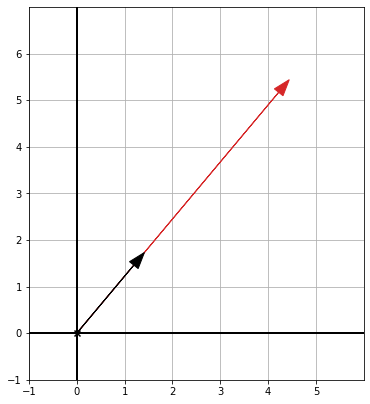

In [40]:
draw(
    Arrow(w_scaled,color=red),
    Arrow(w,color=black)
)

**EXERCISE:**Write a Python function scale(s,v) that multiplies the input vector v by the input scalar s.

In [43]:
def scale(scalar,v):
    return (scalar * v[0],scalar * v[1])

**MINI-PROJECT:**Suppose $\vec{u} = (-1,1)$ and $\vec{v} = (1,1)$ and suppose $r$ and $s$ are real numbers. Specifically, let’s assume -1<r<1 and -3<s<3.

Where are the possilble points on the plane where the vector $r \cdot \vec{u} + s \cdot \vec{v}$ could end up?

Note: the order of operationss is the same for vectors as it is for numbers: we assume scalar multiplication is carried out first, and then vector addition (unless parentheses sepcify otherwise).

In [45]:
from random import uniform
u = (-1,1)
v = (1,1)
def random_r():
    return uniform(-3,3)
def random_s():
    return uniform(-1,1)
possibilities = [add(scale(random_r(),u),scale(random_s(),v)) 
                for i in range(0,500)]
draw(
    Points(*possibilities)
)

TypeError: tuple indices must be integers or slices, not list

# Angles and trigonometry in the plane

## Radians and trigonometry in python

In [46]:
from math import tan
tan(45)

1.6197751905438615

In [47]:
from math import tan,pi
tan(pi/4)

0.9999999999999999

In [48]:
from math import sin,cos
def to_cartesian(polar_vector):
    length,angle = polar_vector[0],polar_vector[1]
    return (length*cos(angle),length*sin(angle))

In [49]:
angle = 37 * pi/180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

In [50]:
from math import asin
sin(1)

0.8414709848078965

In [51]:
asin(sin(1))

1.0

In [52]:
asin(3/sqrt(13))

0.9827937232473292

In [53]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [54]:
cos(2.1587)

-0.5546178784903127

In [55]:
-2/sqrt(13)

-0.5547001962252291

In [56]:
sin(2.158798)

0.832050810398631

In [57]:
3/sqrt(13)

0.8320502943378437

In [58]:
from math import atan2
atan2(3,-2)

2.158798930342464

In [59]:
def to_polar(vector):
    x, y = vector[0],vector[1]
    angle = atan2(y,x)
    return (length(vector),angle)

In [60]:
to_polar((1,0))

(1.0, 0.0)

In [61]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

**EXERCISE:** Confirm that the vector given by cartesian coordinates (-1.34,2.68) has length approximately 3, as expected.

In [62]:
length((-1.34,2.68))

2.9963310898497184

EXERCISE: Locate the angle $10\pi/6$. Do you expect the values of $\cos(10\pi/6)$ and $\sin(10\pi/6)$ to be positive or negative? Use Python to calculate their values and confirm.

SOLUTION: The angle $\pi/6$ is one third of a quarter-turn, so $10\pi/6$ is less than a quarter turn short of a full rotation. This means that it points "down and to the right". The cosine should be positive and the sine should be negative, since distance in this direction corresponds with positive horizontal displacement and negative vertical displacement.

In [63]:
sin(10*pi/6)

-0.8660254037844386

In [64]:
cos(10*pi/6)

0.5

**EXERCISE:** The following list comprehension creates 1000 points in polar coordinates.

In [65]:
polar_coords = [(cos(5*x*pi/500.0),2*pi*x/1000.0) for x in range(0,1000)]

In Python code, convert them to cartsian coordinates, and connect them in a closed loop with line segements to draw a picture.

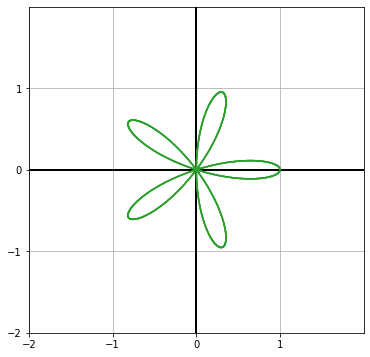

In [67]:
polar_coords = [(cos(5*x*pi/500.0),2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_coords]
draw(Polygon(*vectors,color=green))

**EXERCISE:** Find the angle to get to the point(-2,3) by "guess-and=check".

In [68]:
pi,pi/2

(3.141592653589793, 1.5707963267948966)

In [69]:
tan(1.8)

-4.286261674628062

In [70]:
tan(2.5)

-0.7470222972386602

In [71]:
tan(2.2)

-1.3738230567687948

**EXERCISE:**Find another point in the plane with the same tangent as  $\theta$, that is -3/2. Use Python's implementation of the arctangent function, math.atan, to find the value of this angle.

In [72]:
from math import atan

In [73]:
atan(-3/2)

-0.982793723247329

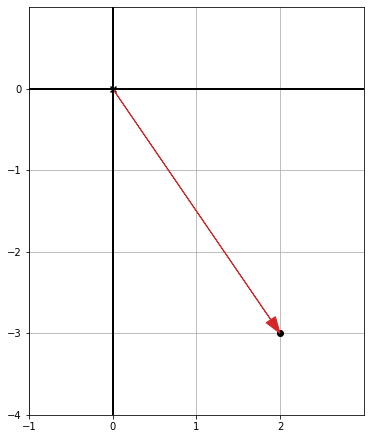

In [74]:
draw(Arrow((2,-3)),Points((2,-3)))

## Transforming collections of vectors

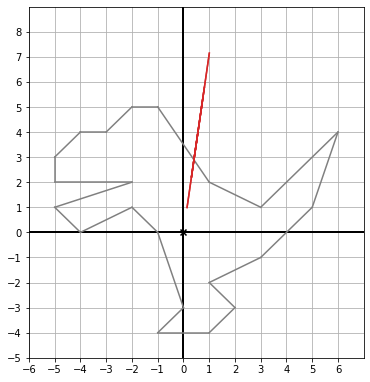

In [80]:
rotation_angle = pi/4

dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l, angle + rotation_angle) for l,anle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors,color=gray),
    Polygon(*dino_rotated,color=red),
)

In [82]:
def rotated(angle,vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l,a+angle)) for l,a in polars]

In [83]:
def regular_polygon(n):
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

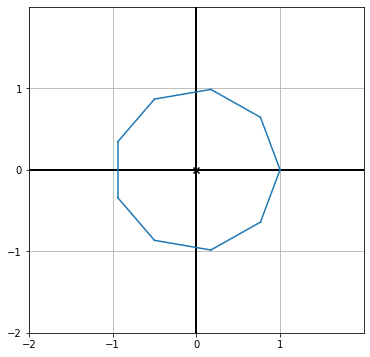

In [88]:
draw(Polygon(*regular_polygon(9)))